<a href="https://colab.research.google.com/github/showravj2-create/Real-world/blob/main/Weather%20forecast%20sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-2263935448.py:33: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  plt.plot(pd.date_range(today["time"].iloc[-1], periods=24, freq="H"), pred,
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127782 (\N{WHITE SUN BEHIND CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


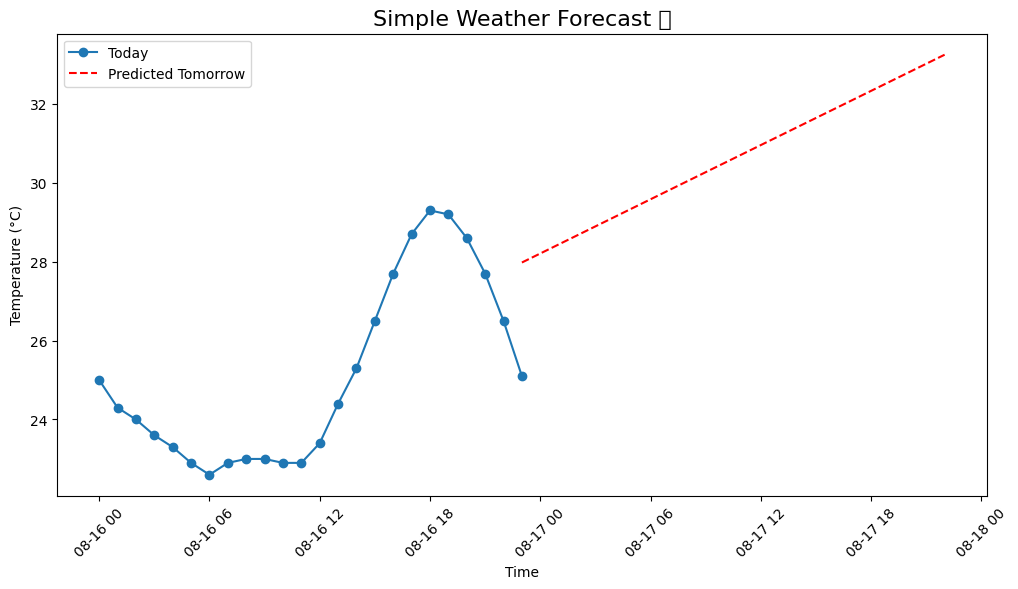

In [9]:
!pip install requests scikit-learn

import requests
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from datetime import datetime

# Get live weather data (Open-Meteo API - no key needed)
lat, lon = 40.7128, -74.0060  # New York City
url = f"https://api.open-meteo.com/v1/forecast?latitude={lat}&longitude={lon}&hourly=temperature_2m"
data = requests.get(url).json()

# Put into DataFrame
temps = data["hourly"]["temperature_2m"]
times = pd.to_datetime(data["hourly"]["time"])
df = pd.DataFrame({"time": times, "temp": temps})

# Train simple model on today’s data
today = df[df["time"].dt.date == datetime.now().date()]
X = np.array(range(len(today))).reshape(-1, 1)
y = today["temp"].values
model = LinearRegression().fit(X, y)

# Predict next 24 hours
future_X = np.array(range(len(today), len(today)+24)).reshape(-1, 1)
pred = model.predict(future_X)

# Plot
plt.figure(figsize=(12,6))
plt.plot(today["time"], today["temp"], label="Today", marker="o")
plt.plot(pd.date_range(today["time"].iloc[-1], periods=24, freq="H"), pred,
         label="Predicted Tomorrow", linestyle="--", color="red")
plt.legend()
plt.title("Simple Weather Forecast 🌦️", fontsize=16)
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)
plt.show()